Chart saved as 'HUL_CCC_Analysis_GS_Style.png' in your working directory.



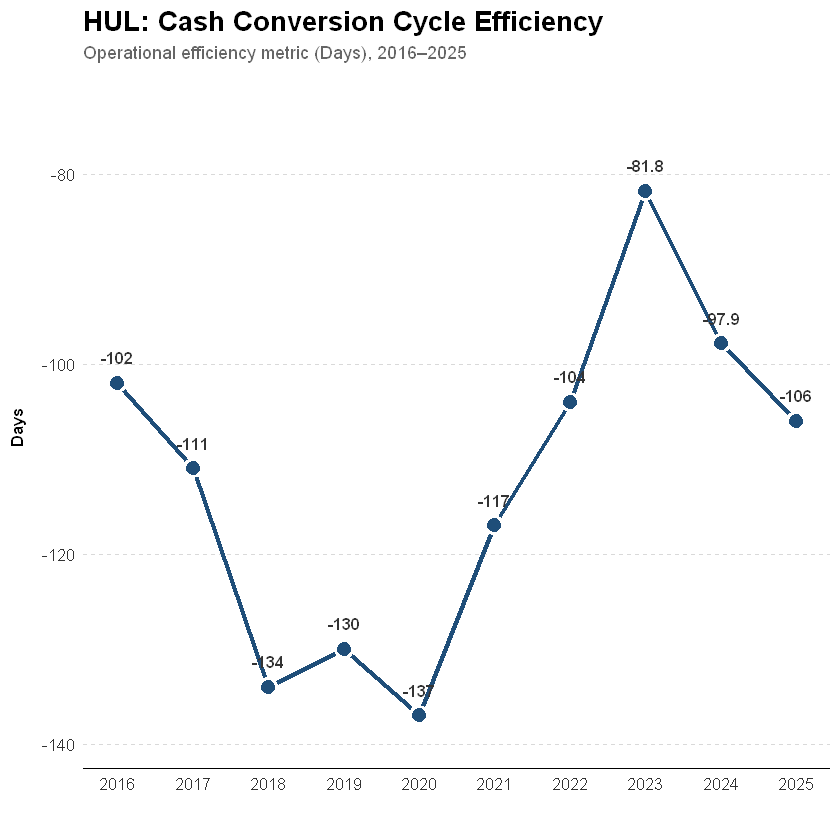

In [3]:
# Load necessary library
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# 1. Create the data
data <- data.frame(
  Year = c(2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025),
  CCC = c(-102, -111, -134, -130, -137, -117, -104, -81.82, -97.87, -106)
)

# 2. Define Goldman Sachs-inspired Design Elements
gs_blue <- "#1F4E79"   # Classic corporate navy
gs_grey <- "#D9D9D9"   # Soft background grey for grids
text_color <- "#333333" # Dark grey for text (softer than pure black)

# 3. Create the Plot
p <- ggplot(data, aes(x = Year, y = CCC)) +
  
  # Main Line and Points
  geom_line(color = gs_blue, size = 1.2) +
  geom_point(color = "white", fill = gs_blue, shape = 21, size = 4, stroke = 1.5) +
  
  # Data Labels (Cleanly positioned above points)
  geom_text(aes(label = round(CCC, 1)), vjust = -1.5, size = 3.5, color = text_color, fontface = "bold") +
  
  # Scale Adjustments (Adding buffer for labels)
  scale_x_continuous(breaks = data$Year) +
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.2))) + # Add space at top/bottom
  
  # Labels
  labs(
    title = "HUL: Cash Conversion Cycle Efficiency",
    subtitle = "Operational efficiency metric (Days), 2016–2025",
    caption = "",
    x = NULL, # Remove X label as years are self-explanatory
    y = "Days"
  ) +
  
  # 4. Apply Custom Corporate Theme
  theme_minimal(base_family = "sans") +
  theme(
    # Text Styling
    plot.title = element_text(face = "bold", size = 16, color = "black", hjust = 0),
    plot.subtitle = element_text(size = 11, color = "#666666", margin = margin(b = 15)),
    plot.caption = element_text(size = 8, color = "#888888", hjust = 0, margin = margin(t = 15)),
    
    # Axis Styling
    axis.text = element_text(color = text_color, size = 10),
    axis.title.y = element_text(size = 10, face = "bold", margin = margin(r = 10)),
    axis.line.x = element_line(color = "black", size = 0.5), # Solid baseline
    
    # Grid Styling (Horizontal only, similar to financial reports)
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_line(color = gs_grey, size = 0.3, linetype = "dashed"),
    
    # Background
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white", color = NA)
  )

# Display the plot
print(p)

# 5. Download/Save to Device
# This saves a high-res PNG to your current working directory
ggsave("HUL_CCC_Analysis_GS_Style.png", plot = p, width = 10, height = 6, dpi = 300)

message("Chart saved as 'HUL_CCC_Analysis_GS_Style.png' in your working directory.")

Chart saved as 'HUL_Liquidity_Analysis.png' in your working directory.



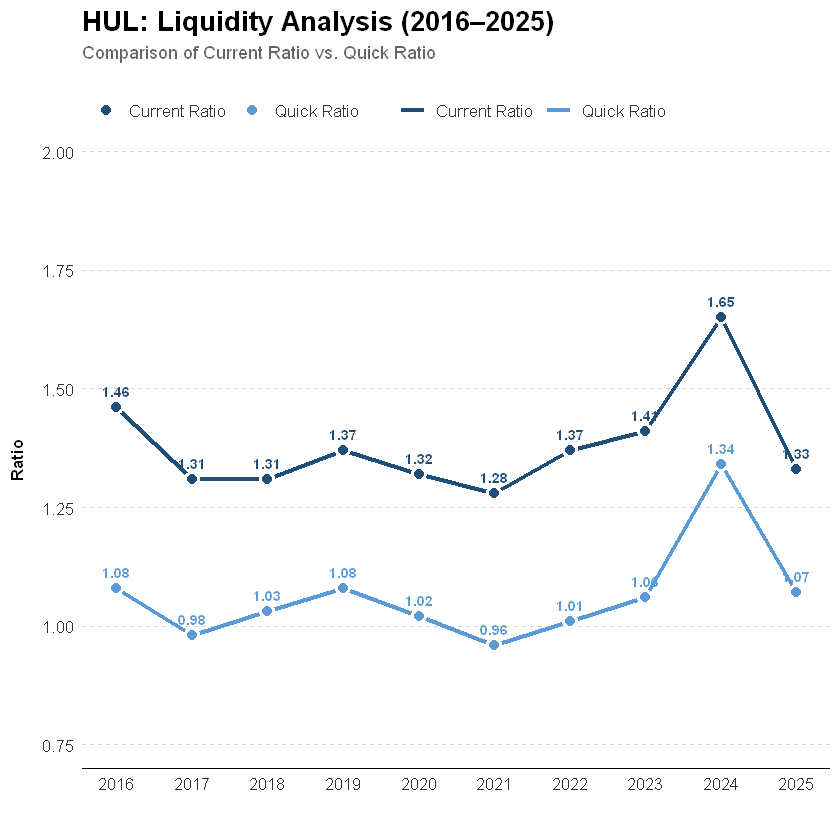

In [5]:
# Load necessary libraries
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(tidyr)) install.packages("tidyr") # Needed to reshape data
library(ggplot2)
library(tidyr)

# 1. Create the data
raw_data <- data.frame(
  Year = c(2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025),
  Quick_Ratio = c(1.08, 0.98, 1.03, 1.08, 1.02, 0.96, 1.01, 1.06, 1.34, 1.07),
  Current_Ratio = c(1.46, 1.31, 1.31, 1.37, 1.32, 1.28, 1.37, 1.41, 1.65, 1.33)
)

# 2. Reshape data for plotting (Wide to Long format)
plot_data <- pivot_longer(raw_data, cols = c("Quick_Ratio", "Current_Ratio"), 
                          names_to = "Metric", values_to = "Ratio")

# Clean up metric names for the legend
plot_data$Metric <- gsub("_", " ", plot_data$Metric)

# 3. Define Design Elements
gs_navy <- "#1F4E79"    # Dark Navy for Current Ratio (Higher value)
gs_blue <- "#5B9BD5"    # Lighter Steel Blue for Quick Ratio
gs_grey <- "#D9D9D9"    # Grid line grey
text_color <- "#333333"

# 4. Create the Plot
p <- ggplot(plot_data, aes(x = Year, y = Ratio, color = Metric, group = Metric)) +
  
  # Lines and Points
  geom_line(size = 1.2) +
  geom_point(aes(fill = Metric), shape = 21, size = 3, stroke = 1.5, color = "white") +
  
  # Data Labels (Smart positioning to avoid overlap)
  geom_text(aes(label = sprintf("%.2f", Ratio)), 
            vjust = -1, size = 3, fontface = "bold", show.legend = FALSE) +
  
  # Manual Color Scale
  scale_color_manual(values = c("Current Ratio" = gs_navy, "Quick Ratio" = gs_blue)) +
  scale_fill_manual(values = c("Current Ratio" = gs_navy, "Quick Ratio" = gs_blue)) +
  
  # Axis Scales
  scale_x_continuous(breaks = raw_data$Year) +
  scale_y_continuous(limits = c(0.8, 1.8), expand = expansion(mult = c(0.1, 0.2))) +
  
  # Labels
  labs(
    title = "HUL: Liquidity Analysis (2016–2025)",
    subtitle = "Comparison of Current Ratio vs. Quick Ratio",
    caption = "",
    x = NULL,
    y = "Ratio",
    color = NULL # Hide legend title
  ) +
  
  # 5. Apply Corporate Theme
  theme_minimal(base_family = "sans") +
  theme(
    # Text
    plot.title = element_text(face = "bold", size = 16, color = "black", hjust = 0),
    plot.subtitle = element_text(size = 11, color = "#666666", margin = margin(b = 15)),
    plot.caption = element_text(size = 8, color = "#888888", hjust = 0, margin = margin(t = 15)),
    
    # Legend (Positioned top-left or bottom to look clean)
    legend.position = "top", 
    legend.justification = "left",
    legend.text = element_text(size = 10, color = text_color),
    legend.title = element_blank(),
    
    # Axes
    axis.text = element_text(color = text_color, size = 10),
    axis.title.y = element_text(size = 10, face = "bold", margin = margin(r = 10)),
    axis.line.x = element_line(color = "black", size = 0.5),
    
    # Grids
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_line(color = gs_grey, size = 0.3, linetype = "dashed"),
    
    # Background
    plot.background = element_rect(fill = "white", color = NA)
  )

# Display
print(p)

# 6. Save to Device
ggsave("HUL_Liquidity_Analysis.png", plot = p, width = 10, height = 6, dpi = 300)
message("Chart saved as 'HUL_Liquidity_Analysis.png' in your working directory.")

Chart saved as 'HUL_Profitability_Margins_v2.png'.



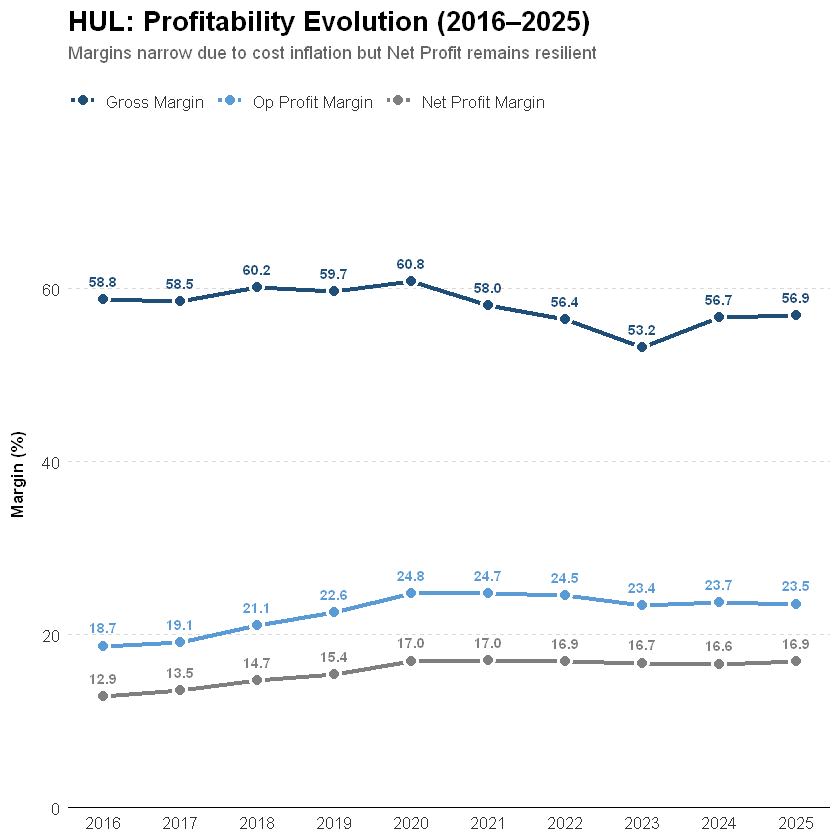

In [8]:
# Load necessary libraries
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(tidyr)) install.packages("tidyr")
library(ggplot2)
library(tidyr)

# 1. Create the data
raw_data <- data.frame(
  Year = c(2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025),
  Gross_Margin = c(58.78, 58.54, 60.16, 59.66, 60.81, 58.03, 56.43, 53.2, 56.68, 56.92),
  Op_Profit_Margin = c(18.69, 19.12, 21.1, 22.59, 24.79, 24.72, 24.51, 23.36, 23.69, 23.53),
  Net_Profit_Margin = c(12.86, 13.5, 14.67, 15.4, 16.96, 17, 16.93, 16.71, 16.6, 16.87)
)

# 2. Reshape data
plot_data <- pivot_longer(raw_data, cols = c("Gross_Margin", "Op_Profit_Margin", "Net_Profit_Margin"), 
                          names_to = "Metric", values_to = "Percentage")

# Clean up names and set factor order
plot_data$Metric <- gsub("_", " ", plot_data$Metric)
plot_data$Metric <- factor(plot_data$Metric, levels = c("Gross Margin", "Op Profit Margin", "Net Profit Margin"))

# 3. Define Colors
colors <- c("Gross Margin" = "#1F4E79", "Op Profit Margin" = "#5B9BD5", "Net Profit Margin" = "#7F7F7F")

# 4. Create the Plot
p <- ggplot(plot_data, aes(x = Year, y = Percentage, color = Metric, group = Metric)) +
  
  # Lines and Points
  geom_line(size = 1.2) +
  geom_point(aes(fill = Metric), shape = 21, size = 3, stroke = 1.5, color = "white") +
  
  # Data Labels
  geom_text(aes(label = sprintf("%.1f", Percentage)), 
            vjust = -1.2, size = 3, fontface = "bold", show.legend = FALSE) +
  
  # Scales & Colors
  scale_color_manual(values = colors) +
  scale_fill_manual(values = colors) +
  scale_x_continuous(breaks = raw_data$Year) +
  scale_y_continuous(limits = c(0, 70), expand = expansion(mult = c(0, 0.1))) +
  
  # Legend Formatting: Force 2 Rows
  guides(color = guide_legend(nrow = 1, byrow = TRUE), fill = guide_legend(nrow = 1, byrow = TRUE)) +
  
  # Labels (Caption Removed)
  labs(
    title = "HUL: Profitability Evolution (2016–2025)",
    subtitle = "Margins narrow due to cost inflation but Net Profit remains resilient",
    x = NULL,
    y = "Margin (%)",
    color = NULL,
    fill = NULL
  ) +
  
  # 5. Theme
  theme_minimal(base_family = "sans") +
  theme(
    # Typography
    plot.title = element_text(face = "bold", size = 16, color = "black", hjust = 0),
    plot.subtitle = element_text(size = 11, color = "#666666", margin = margin(b = 15)),
    
    # Legend Styling
    legend.position = "top", 
    legend.justification = "left",
    legend.text = element_text(size = 10, color = "#333333"),
    legend.margin = margin(b = 5), # Add slight space below legend
    
    # Grid & Axes
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_line(color = "#D9D9D9", size = 0.3, linetype = "dashed"),
    axis.line.x = element_line(color = "black", size = 0.5),
    axis.text = element_text(color = "#333333", size = 10),
    axis.title.y = element_text(face = "bold", size = 10, margin = margin(r = 10)),
    
    # Background
    plot.background = element_rect(fill = "white", color = NA)
  )

# Display
print(p)

# 6. Save
ggsave("HUL_Profitability_Margins_v2.png", plot = p, width = 10, height = 6, dpi = 300)
message("Chart saved as 'HUL_Profitability_Margins_v2.png'.")

Chart saved as 'HUL_Return_Ratios_Merger_Effect.png'.



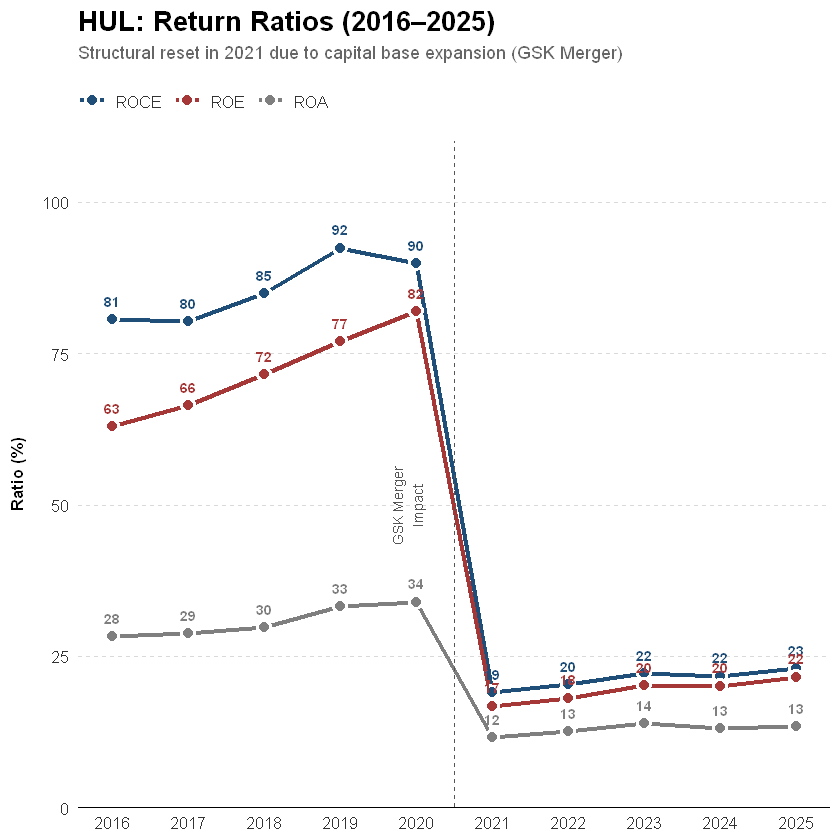

In [9]:
# Load necessary libraries
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(tidyr)) install.packages("tidyr")
library(ggplot2)
library(tidyr)

# 1. Create the data
raw_data <- data.frame(
  Year = c(2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025),
  ROCE = c(80.57, 80.25, 84.9, 92.45, 89.95, 19.02, 20.3, 22.15, 21.73, 22.92),
  ROE = c(62.97, 66.37, 71.61, 76.95, 82.00, 16.77, 18.1, 20.12, 20.07, 21.56),
  ROA = c(28.30, 28.81, 29.69, 33.16, 33.96, 11.63, 12.59, 13.85, 13.09, 13.33)
)

# 2. Reshape data (Wide to Long)
plot_data <- pivot_longer(raw_data, cols = c("ROCE", "ROE", "ROA"), 
                          names_to = "Metric", values_to = "Percentage")

# Set factor order for the legend (ROCE is usually the highest/most important)
plot_data$Metric <- factor(plot_data$Metric, levels = c("ROCE", "ROE", "ROA"))

# 3. Define Corporate Color Palette
# Navy for ROCE, Dark Red for ROE (Equity), Grey for ROA (Assets)
colors <- c("ROCE" = "#1F4E79", "ROE" = "#A63737", "ROA" = "#7F7F7F")

# 4. Create the Plot
p <- ggplot(plot_data, aes(x = Year, y = Percentage, color = Metric, group = Metric)) +
  
  # Lines and Points
  geom_line(size = 1.2) +
  geom_point(aes(fill = Metric), shape = 21, size = 3, stroke = 1.5, color = "white") +
  
  # Data Labels (Selectively label to avoid clutter, or label all)
  geom_text(aes(label = sprintf("%.0f", Percentage)), 
            vjust = -1.2, size = 3, fontface = "bold", show.legend = FALSE) +
  
  # Annotation for the Structural Break (The "Cliff")
  geom_vline(xintercept = 2020.5, linetype = "dashed", color = "#555555", size = 0.5) +
  annotate("text", x = 2020.5, y = 50, label = "GSK Merger\nImpact", 
           color = "#555555", size = 3, angle = 90, vjust = -1) +

  # Colors & Scales
  scale_color_manual(values = colors) +
  scale_fill_manual(values = colors) +
  scale_x_continuous(breaks = raw_data$Year) +
  scale_y_continuous(limits = c(0, 100), expand = expansion(mult = c(0, 0.1))) +
  
  # Legend formatting (1 Row)
  guides(color = guide_legend(nrow = 1), fill = guide_legend(nrow = 1)) +
  
  # Labels
  labs(
    title = "HUL: Return Ratios (2016–2025)",
    subtitle = "Structural reset in 2021 due to capital base expansion (GSK Merger)",
    x = NULL,
    y = "Ratio (%)",
    color = NULL,
    fill = NULL
  ) +
  
  # 5. Theme
  theme_minimal(base_family = "sans") +
  theme(
    # Typography
    plot.title = element_text(face = "bold", size = 16, color = "black", hjust = 0),
    plot.subtitle = element_text(size = 11, color = "#666666", margin = margin(b = 15)),
    
    # Legend Styling
    legend.position = "top", 
    legend.justification = "left",
    legend.text = element_text(size = 10, color = "#333333"),
    legend.margin = margin(b = 5),
    
    # Grid & Axes
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_line(color = "#D9D9D9", size = 0.3, linetype = "dashed"),
    axis.line.x = element_line(color = "black", size = 0.5),
    axis.text = element_text(color = "#333333", size = 10),
    axis.title.y = element_text(face = "bold", size = 10, margin = margin(r = 10)),
    
    # Background
    plot.background = element_rect(fill = "white", color = NA)
  )

# Display
print(p)

# 6. Save
ggsave("HUL_Return_Ratios_Merger_Effect.png", plot = p, width = 10, height = 6, dpi = 300)
message("Chart saved as 'HUL_Return_Ratios_Merger_Effect.png'.")